## Домашнее задание

- Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
- Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
- Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
- Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
- Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
- Могла ли модель переобучиться? Почему? 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [192]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

- Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [193]:
def calc_logloss(y, y_pred):
    y_pred = y_pred.copy()
    y_pred = np.clip(y_pred, a_min=1e-4, a_max=1-1e-4)
    logloss = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    
    return logloss

In [194]:
#from numpy import errstate, isneginf, array
#with errstate(divide='ignore'):
    #res = np.log(y)
    #res[isneginf(res)]=0
    
#альтернативный вариант, который отлично работает на простом массиве, но почему-то не хочет в функции. 
#При проверке выдает ошибку

- Масштабирование признаков

In [195]:
def scale(X):
    """
    Масштабирование данных
    
    X: матрица признаков
    
    returns: масштабированная матрица признаков
    
    """
    #Берем все значения, кроме единиц
    X_scaled = X[1:,].copy()
    
    # расчет среднего и отклонения для каждого признака (строго по столбцам!!!)
    X_mean, X_std = X_scaled.mean(axis=1), X_scaled.std(axis=1)
    X_mean, X_std = X_mean.reshape(X_scaled.shape[0], 1), X_std.reshape(X_scaled.shape[0], 1)

    # стандартизуем параметры
    X_scaled = (X_scaled - X_mean) / X_std
    
    # добавляем строку с единицами
    X_scaled = np.vstack((np.ones(X_scaled.shape[1]), X_scaled))
    
    return X_scaled

#для линейной регрессии можно было бы сразу возвращать X_scaled.T

- функция сигмоида

In [196]:
def sigmoid(z):
    """
    Вычисление вероятности принадлежности к классу
    
    z: матрица признаков с весами
    
    returns: вероятность принадлежности к классу
    
    """

    res = 1 / (1 + np.exp(-z))
    return res

In [197]:
X = scale(X)

In [198]:
def eval_model(X, y, iterations, alpha, add_weights=False):
    """
    Реализация градиентного спуска с подсчетом логарифмической функции потерь
    
    X: матрица признаков
    y: истинные значения таргета
    
    returns: массив ошибок

    """
    
    np.random.seed(27)
    n = X.shape[1]
    W = np.random.randn(X.shape[0])
    errors = []
    weights = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) 
        
        weights.append(W)
        errors.append(err)
        
    if add_weights:
        return weights

    return errors

In [199]:
#задание с подбором функции eval_model с минимальными ошибками схоже с той задачей, 
#которую мы выполняли для алгоритма линейной регрессии 

In [200]:
def visualization(errors, alpha, iterations):
    """
    Визуализация сходимости функции ошибок модели
    
    errors: массив ошибок
    alpha: скорость обучения
    iterations: кол-во итераций
    add_weights: дополнительные веса
    
    returns: график функции ошибок
    
    """
    plt.plot(range(len(errors)), errors, c='g')
    plt.title(f'Log-loss at {iterations} iterations and alpha {alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Log-loss')
    plt.grid()
    plt.show()

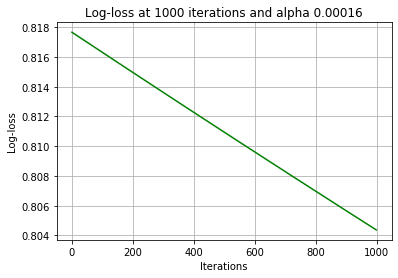

Минимальная ошибка: 0.80437
------------------------------------------------


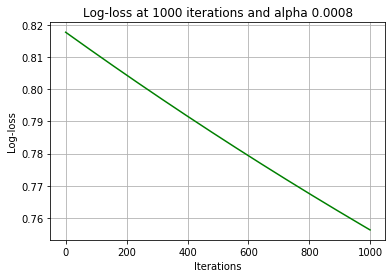

Минимальная ошибка: 0.7563
------------------------------------------------


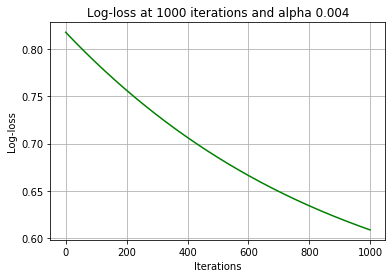

Минимальная ошибка: 0.60862
------------------------------------------------


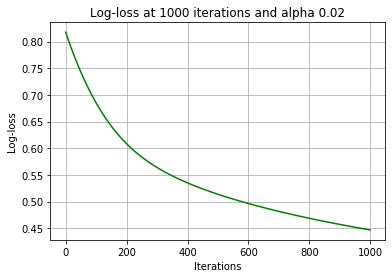

Минимальная ошибка: 0.44675
------------------------------------------------


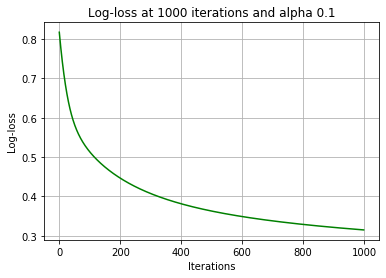

Минимальная ошибка: 0.31483
------------------------------------------------


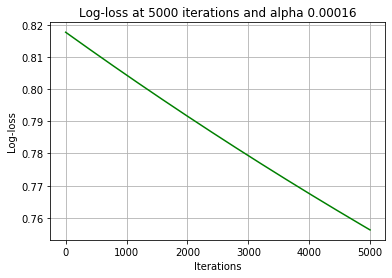

Минимальная ошибка: 0.75626
------------------------------------------------


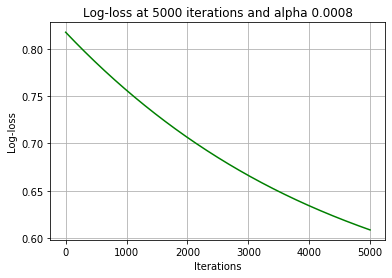

Минимальная ошибка: 0.60855
------------------------------------------------


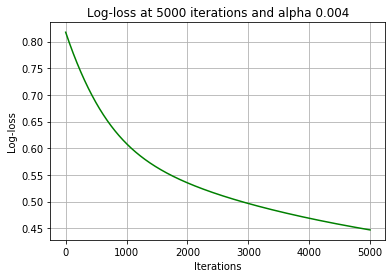

Минимальная ошибка: 0.44669
------------------------------------------------


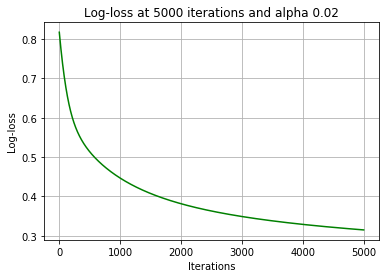

Минимальная ошибка: 0.31481
------------------------------------------------


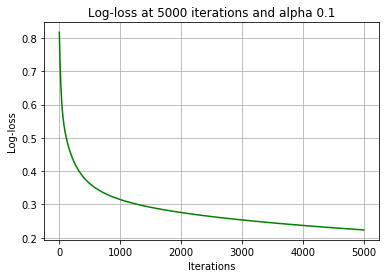

Минимальная ошибка: 0.22343
------------------------------------------------


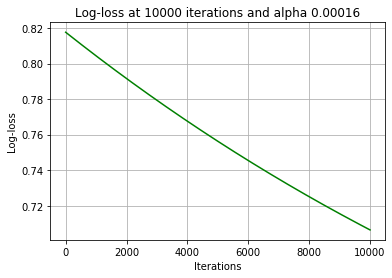

Минимальная ошибка: 0.70635
------------------------------------------------


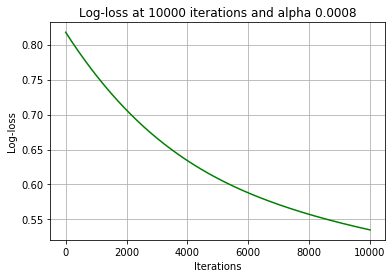

Минимальная ошибка: 0.53503
------------------------------------------------


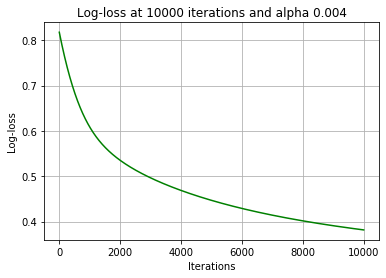

Минимальная ошибка: 0.38143
------------------------------------------------


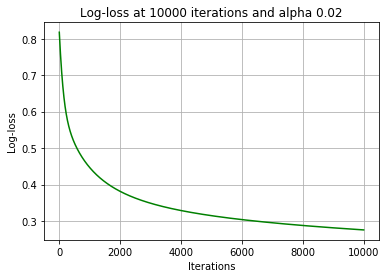

Минимальная ошибка: 0.27577
------------------------------------------------


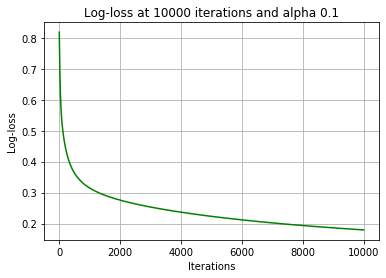

Минимальная ошибка: 0.17968
------------------------------------------------


In [201]:
alphas = [0.00016, 0.0008, 0.004, 0.02, 0.1]
iterations = [1000, 5000, 10000]

for iter_num in iterations:
    for alpha in alphas:
        errors = eval_model(X, y, iter_num, alpha)
        visualization(errors, alpha, iter_num)
        
        print(f'Минимальная ошибка: {round(errors[-1], 5)}')
        print('------------------------------------------------')

In [166]:
#Наилучшие значения минимальной ошибки при самой большой скорости обучения alpha=0.1 и самом большом кол-ве итераций 10000

- Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [202]:
weights = eval_model(X, y, 10000, 0.1, add_weights=True)[1]

In [203]:
def calc_pred_proba(X, W, threshold=0.7):
    """
    Подсчет вероятностей принадлежности к классу 1
    
    X: матрица признаков
    W: оптимизированные веса 
    threshold: пороговое значение, согласно которому объекты разделяются на классы
    
    returns: массив вероятностей принадлежности объекта к классу 1 class_1_proba
    
    """
    
    class_1_proba = []
    class_0_proba = []
    
    z = np.dot(W, X)
    y_pred = sigmoid(z)

    for proba in y_pred:
        if proba >= threshold:  
            class_1_proba.append(proba)
            
    return class_1_proba

In [204]:
calc_pred_proba(X, weights)

[0.999987873393632, 0.8143125660249577, 0.999998705901525, 0.9998115313900783]

- Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [205]:
def calc_pred(X, W, threshold=0.7):
    """
    Определение принадлежности к классу/ задача, обратная предыдущей.
    
    X: матрица признаков
    W: оптимизированные веса 
    threshold: порог, согласно которому объекты разделяются на классы
    
    returns: массив соответствующих классов y_pred_class
    """
    y_pred_class = []
    
    z = np.dot(W, X)
    y_pred = sigmoid(z)

    for proba in y_pred:
        if proba >= threshold:  
            y_pred_class.append(1)
        else: 
            y_pred_class.append(0)
            
    return y_pred_class

In [206]:
calc_pred(X, weights)

[0, 0, 1, 0, 1, 0, 1, 0, 0, 1]

- Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score

In [207]:
def mistake_matrix(y, y_pred):
    
    """
    Составление матрицы ошибок модели
    
    y: истинные значения таргета
    y-pred: предсказанные значения таргета
    
    """
    #Создадим сразу нулевую матрицу, чтобы потом заполнить её. 
    matrix = np.zeros(shape=(2, 2))
    
    # True Negative
    matrix[0, 0] = np.sum(np.where(y == 0, y_pred == y, False))
    
    # False Positive    
    matrix[1, 1] = np.sum(np.where(y == 1, y_pred == y, False))
    
    # False Negative 
    matrix[0, 1] = np.sum(np.where(y == 1, y_pred != y, False))
    
    # True Positive 
    matrix[1, 0] = np.sum(np.where(y == 0, y_pred != y, False))

                          
    return matrix

In [208]:
def precision(y, y_pred):
    """
    Вычисление метрики precision
  
    """
    matrix = mistake_matrix(y, y_pred)
    
    return matrix[0, 0] / (matrix[0, 0] + matrix[1, 1])

In [209]:
def accuracy(y, y_pred): 
    """
    Вычисление метрики accuracy  
    
    """
    return (y == y_pred).sum() / len(y)

In [211]:
def recall(y, y_pred):
    """
    Вычисление метрики recall
  
    """
        
    matrix = mistake_matrix(y, y_pred)
    
    return matrix[0, 0] / (matrix[0, 0] + matrix[1, 0])

In [212]:
def F_score(y, y_pred):
    """
    Вычисление F-метрики

    """
    
    return 2 * precision(y, y_pred) * recall(y, y_pred) / (precision(y, y_pred) + recall(y, y_pred))

In [213]:
y_pred = calc_pred(X, weights)

In [214]:
print('Precision parameters')
print('--------------------')
print(f'Accuracy:\t{accuracy(y, y_pred)}')
print(f'Precision:\t{precision(y, y_pred)}')
print(f'Recall:\t\t{recall(y, y_pred)}')
print(f'F-score:\t{F_score(y, y_pred)}')

print(f'Сonfusion_matrix:\n{mistake_matrix(y, y_pred)}')

Precision parameters
--------------------
Accuracy:	0.9
Precision:	0.5555555555555556
Recall:		1.0
F-score:	0.7142857142857143
Сonfusion_matrix:
[[5. 1.]
 [0. 4.]]


- Могла ли модель переобучиться? Почему?

In [215]:
#Конечно, могла. Потому что очень мало объектов